In [1]:
import matplotlib.pyplot as plt
import joblib
import networkx as nx

In [2]:
s = joblib.load("results/r_reg_reb_26(PV)_sun_4.gz")

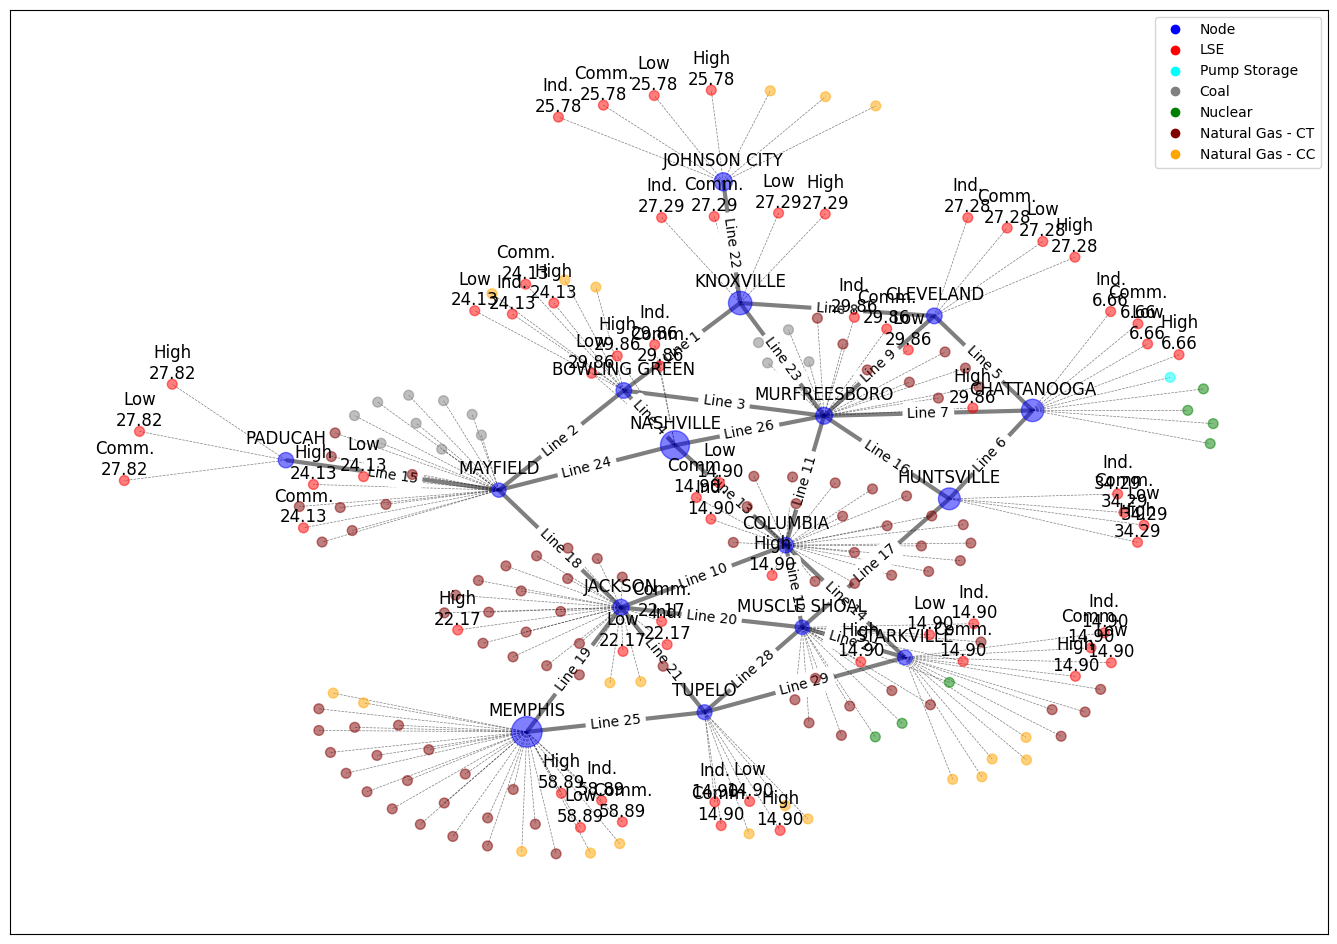

In [3]:
generator_colors = {
    'Pump Storage': 'cyan',
    'Coal': 'grey',
    'Nuclear': 'green',
    'Natural Gas - CT': 'maroon',
    'Natural Gas - CC': 'orange',
}

generator_type_replacement = {
    'Combined': 'Natural Gas - CC',
    'Conbined Cycle Natural Gas': 'Natural Gas - CC', 
    'Hydro (Extra)': 'Pump Storage',
    'Natural Gas': 'Natural Gas - CT',
    'Coal': 'Coal',
    'Nuclear': 'Nuclear',
}

def _node_label(n):
    # return f"Node {s.nodes.index(n) + 1}\n\n"
    return f"Node {s.nodes.index(n) + 1}\n\n"

G = nx.Graph()
for node in s.nodes:
    node_label = _node_label(node)
    G.add_node(
        node_label,
        node=node,
        type="Node",
        name=node.name,
        color='blue',
        size=(
            sum([l.initial_number_of_customers for l in node.lses]) 
            / max([l.initial_number_of_customers for l in s.lses])
            * 300
            + 100
        ),
    )
    # add the generators
    list_of_generators = [generator for generator in node.generators if not generator.is_detached]
    for generator in list_of_generators:
        generator_label = f"\n\nGenerator {s.generators.index(generator) + 1}"
        G.add_node(
            generator_label,
            generator=generator,
            type="Generator",
            name=generator.name,
            color=generator_colors[generator_type_replacement[generator.type]],
            size=50,
        )
        G.add_edge(
            node_label,
            generator_label,
            weights=0.4
        )
    for lse in node.lses:
        lse_label = f"LSE {lse.name}"
        G.add_node(
            lse_label,
            lse=lse,
            type="LSE",
            name=lse.name,
            color='red',
            size=50,
        )
        G.add_edge(
            node_label,
            lse_label,
            weights=0.4
        )


# Add the Tranmission Lines
for i, line in enumerate(s.lines):
    for node1 in s.nodes:
        if line.node1 == node1:
            for node2 in s.nodes:
                if line.node2 == node2:
                    G.add_edge(
                        _node_label(node1),
                        _node_label(node2),
                        node1=node2,
                        node2=node2,
                        type='Main',
                        line=line,
                        label=f"Line {i + 1}",
                        weights=1
                    )
pos = nx.kamada_kawai_layout(
    G,
    scale=0.9
)

fig = plt.figure(figsize=(17,12))
ax = plt.gca()
nx.draw_networkx(
    G=G,
    pos=pos,
    ax=ax,
    with_labels=False,
    node_color=[G.nodes[n]['color'] for n in G.nodes],
    node_size=[G.nodes[n]['size'] for n in G.nodes],
    font_size=10,
    width=[
        3 if 'node1' in G.edges[edge].keys() else 0.5
        for edge in G.edges
    ],
    style=[
        'solid' if 'node1' in G.edges[edge].keys() else 'dashed'
        for edge in G.edges
    ],
    alpha=0.5,
)

nx.draw_networkx_labels(
    G=G,
    pos=pos,
    ax=ax,
    labels={
        n: f"{G.nodes[n]['name']}\n\n"
        for n in G.nodes if G.nodes[n]['type']=='Node'
    },
)

def lse_type(name):
    for i in [("High", "High"), ("Low", "Low"), ("Industrial", "Ind."), ("Commercial", "Comm.")]:
        if i[0] in name:
            return i[1]

nx.draw_networkx_labels( # Draw LSE labels
    G=G,
    pos=pos,
    ax=ax,
    labels={
        n: f"{lse_type(G.nodes[n]['lse'].name)}\n{G.nodes[n]['lse'].lmp[-1]:,.2f}\n\n"
        for n in G.nodes if G.nodes[n]['type']=='LSE'
    },
)

nx.draw_networkx_edge_labels(
    G=G,
    ax=ax,
    pos=pos,
    edge_labels={
        (n1, n2): G.edges[n1, n2]['label'] for n1, n2
        in G.edges
        if 'label' in G.edges[n1, n2].keys()
    }
)
plt.legend(
    handles=[
        plt.Line2D([],[],marker='o',color='blue',ls='',label='Node')
    ] + [
        plt.Line2D([],[],marker='o',color='red',ls='',label='LSE')
    ] + [
        plt.Line2D([],[],marker='o',color=v,ls='',label=k)
        for k,v in generator_colors.items()
    ]
)
plt.axis('on')
plt.show()

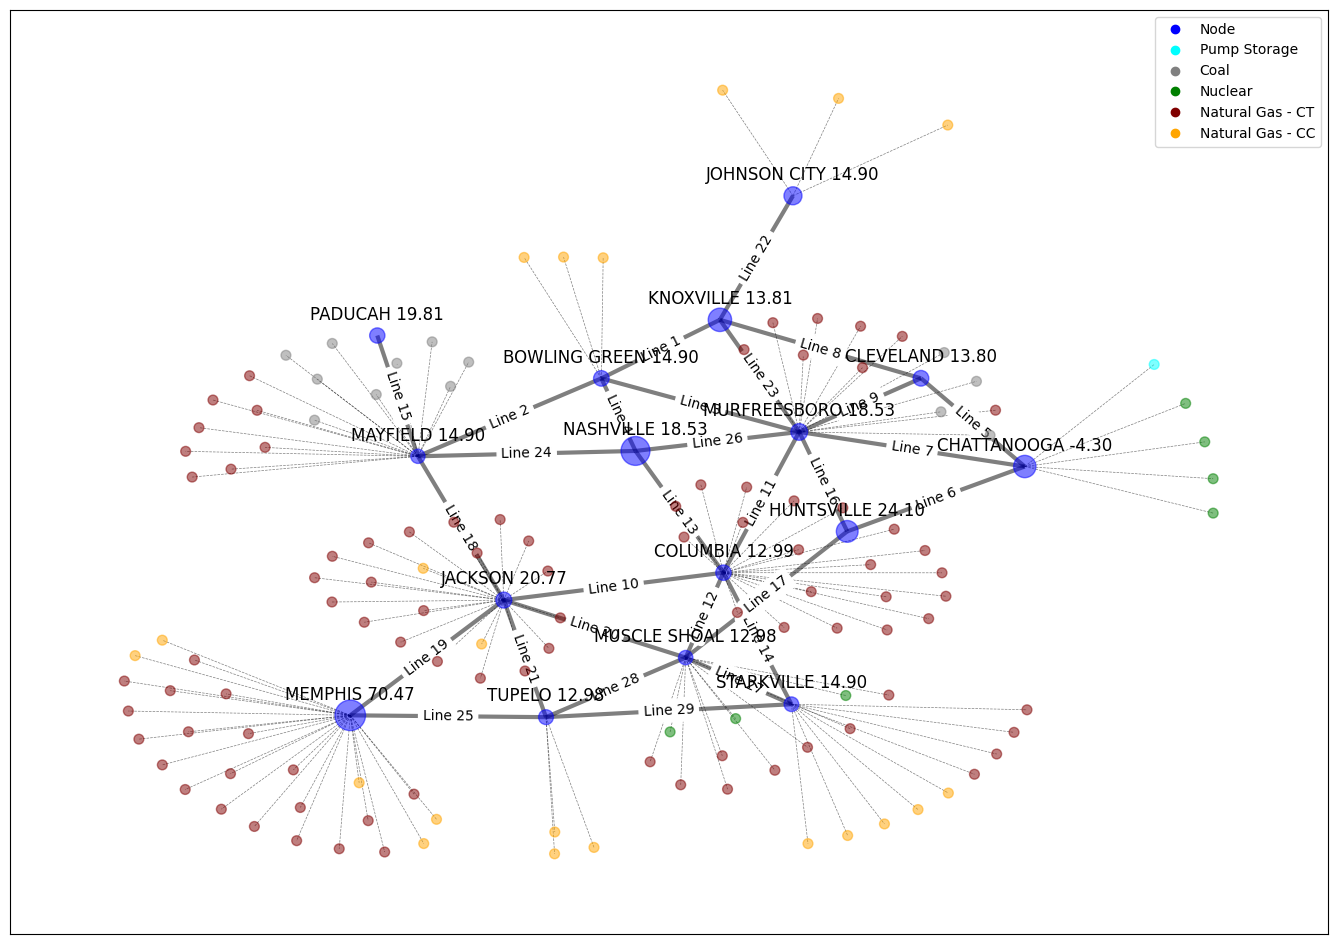

In [4]:
generator_colors = {
    'Pump Storage': 'cyan',
    'Coal': 'grey',
    'Nuclear': 'green',
    'Natural Gas - CT': 'maroon',
    'Natural Gas - CC': 'orange',
}

generator_type_replacement = {
    'Combined': 'Natural Gas - CC',
    'Conbined Cycle Natural Gas': 'Natural Gas - CC', 
    'Hydro (Extra)': 'Pump Storage',
    'Natural Gas': 'Natural Gas - CT',
    'Coal': 'Coal',
    'Nuclear': 'Nuclear',
}

def _node_label(n):
    # return f"Node {s.nodes.index(n) + 1}\n\n"
    return f"Node {s.nodes.index(n) + 1}\n\n"

G = nx.Graph()
for node in s.nodes:
    node_label = _node_label(node)
    G.add_node(
        node_label,
        node=node,
        type="Node",
        name=node.name,
        color='blue',
        size=(
            sum([l.initial_number_of_customers for l in node.lses]) 
            / max([l.initial_number_of_customers for l in s.lses])
            * 300
            + 100
        ),
    )
    # add the generators
    list_of_generators = [generator for generator in node.generators if not generator.is_detached]
    for generator in list_of_generators:
        generator_label = f"\n\nGenerator {s.generators.index(generator) + 1}"
        G.add_node(
            generator_label,
            generator=generator,
            type="Generator",
            name=generator.name,
            color=generator_colors[generator_type_replacement[generator.type]],
            size=50,
        )
        G.add_edge(
            node_label,
            generator_label,
            weights=0.4
        )
    # for lse in node.lses:
    #     lse_label = f"LSE {lse.name}"
    #     G.add_node(
    #         lse_label,
    #         lse=lse,
    #         type="LSE",
    #         name=lse.name,
    #         color='red',
    #         size=50,
    #     )
    #     G.add_edge(
    #         node_label,
    #         lse_label,
    #         weights=0.4
    #     )


# Add the Tranmission Lines
for i, line in enumerate(s.lines):
    for node1 in s.nodes:
        if line.node1 == node1:
            for node2 in s.nodes:
                if line.node2 == node2:
                    G.add_edge(
                        _node_label(node1),
                        _node_label(node2),
                        node1=node2,
                        node2=node2,
                        type='Main',
                        line=line,
                        label=f"Line {i + 1}",
                        weights=1
                    )
pos = nx.kamada_kawai_layout(
    G,
    scale=0.9
)

fig = plt.figure(figsize=(17,12))
ax = plt.gca()
nx.draw_networkx(
    G=G,
    pos=pos,
    ax=ax,
    with_labels=False,
    node_color=[G.nodes[n]['color'] for n in G.nodes],
    node_size=[G.nodes[n]['size'] for n in G.nodes],
    font_size=10,
    width=[
        3 if 'node1' in G.edges[edge].keys() else 0.5
        for edge in G.edges
    ],
    style=[
        'solid' if 'node1' in G.edges[edge].keys() else 'dashed'
        for edge in G.edges
    ],
    alpha=0.5,
)

nx.draw_networkx_labels(
    G=G,
    pos=pos,
    ax=ax,
    labels={
        n: f"{G.nodes[n]['name']} {G.nodes[n]['node'].lmp[0]:,.2f}\n\n"
        for n in G.nodes if G.nodes[n]['type']=='Node'
    },
)

# def lse_type(name):
#     for i in [("High", "High"), ("Low", "Low"), ("Industrial", "Ind."), ("Commercial", "Comm.")]:
#         if i[0] in name:
#             return i[1]

# nx.draw_networkx_labels( # Draw LSE labels
#     G=G,
#     pos=pos,
#     ax=ax,
#     labels={
#         n: f"{lse_type(G.nodes[n]['lse'].name)}\n{G.nodes[n]['lse'].lmp[-1]:,.2f}\n\n"
#         for n in G.nodes if G.nodes[n]['type']=='LSE'
#     },
# )

nx.draw_networkx_edge_labels(
    G=G,
    ax=ax,
    pos=pos,
    edge_labels={
        (n1, n2): G.edges[n1, n2]['label'] for n1, n2
        in G.edges
        if 'label' in G.edges[n1, n2].keys()
    }
)
plt.legend(
    handles=[
        plt.Line2D([],[],marker='o',color='blue',ls='',label='Node')
    ] + [
        # plt.Line2D([],[],marker='o',color='red',ls='',label='LSE')
    ] + [
        plt.Line2D([],[],marker='o',color=v,ls='',label=k)
        for k,v in generator_colors.items()
    ]
)
plt.axis('on')
plt.show()